In [ ]:
#! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ahmedgamal022","key":"c84639c60c259661c9e0b2645add01d0"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
 ! kaggle datasets list

ref                                                       title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                     Data Science Salaries 2023 💸                       25KB  2023-04-13 09:55:16          13905        369  1.0              
chitrakumari25/corona-virus-latest-data-2023              Corona virus latest data 2023                      10KB  2023-04-29 16:00:51           1152         33  1.0              
utkarshx27/starbucks-nutrition                            Starbucks Nutrition Facts                           2KB  2023-05-10 05:42:59            680         26  1.0              
utkarshx27/monthly-transportation-statistics              Monthly Transportation Statistics         

In [ ]:
! kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri

 99% 86.0M/86.8M [00:03<00:00, 36.2MB/s]
100% 86.8M/86.8M [00:03<00:00, 28.8MB/s]


In [ ]:
! unzip /content/brain-tumor-classification-mri.zip 

Archive:  /content/brain-tumor-classification-mri.zip
  inflating: Testing/glioma_tumor/image(1).jpg  
  inflating: Testing/glioma_tumor/image(10).jpg  
  inflating: Testing/glioma_tumor/image(100).jpg  
  inflating: Testing/glioma_tumor/image(11).jpg  
  inflating: Testing/glioma_tumor/image(12).jpg  
  inflating: Testing/glioma_tumor/image(13).jpg  
  inflating: Testing/glioma_tumor/image(14).jpg  
  inflating: Testing/glioma_tumor/image(15).jpg  
  inflating: Testing/glioma_tumor/image(16).jpg  
  inflating: Testing/glioma_tumor/image(17).jpg  
  inflating: Testing/glioma_tumor/image(18).jpg  
  inflating: Testing/glioma_tumor/image(19).jpg  
  inflating: Testing/glioma_tumor/image(2).jpg  
  inflating: Testing/glioma_tumor/image(20).jpg  
  inflating: Testing/glioma_tumor/image(21).jpg  
  inflating: Testing/glioma_tumor/image(22).jpg  
  inflating: Testing/glioma_tumor/image(23).jpg  
  inflating: Testing/glioma_tumor/image(24).jpg  
  inflating: Testing/glioma_tumor/image(25).jpg

In [ ]:
import tensorflow as tf
import cv2
import numpy as np

In [ ]:
#Check image channels
# Load the image
image = cv2.imread('/content/Testing/no_tumor/image(1).jpg')

# Get the number of channels in the image
num_channels = image.shape[2]

print(f"The image has {num_channels} channels.")

The image has 3 channels.


**Since our images RGB then we can work with pre-trained models**

In [ ]:
import os

base_dir = '/content' 
print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/Training'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/Testing'))

Contents of base directory:
['.config', 'kaggle.json', 'brain-tumor-classification-mri.zip', 'Testing', 'Training', 'sample_data']

Contents of train directory:
['no_tumor', 'glioma_tumor', 'meningioma_tumor', 'pituitary_tumor']

Contents of validation directory:
['no_tumor', 'glioma_tumor', 'meningioma_tumor', 'pituitary_tumor']


In [ ]:
train_dir = os.path.join(base_dir, 'Training')
testing_dir = os.path.join(base_dir, 'Testing')

# Directory with training Burn pictures
train_meningioma = os.path.join(train_dir, 'meningioma_tumor')
train_pituitary = os.path.join(train_dir, 'pituitary_tumor')
train_glioma = os.path.join(train_dir, 'glioma_tumor')
train_no_tumor = os.path.join(train_dir, 'no_tumor')

# Directory with testing Burn pictures
testing_meningioma = os.path.join(testing_dir, 'meningioma_tumor')
testing_pituitary = os.path.join(testing_dir, 'pituitary_tumor')
testing_glioma = os.path.join(testing_dir, 'glioma_tumor')
testing_no_tumor = os.path.join(testing_dir, 'no_tumor')

In [ ]:
train_meningioma_fnames = os.listdir(train_meningioma)
train_pituitary_fnames = os.listdir(train_pituitary)
train_glioma_fnames = os.listdir(train_glioma)
train_noTumor_fnames = os.listdir(train_no_tumor)


print(train_meningioma_fnames[:10])
print(train_pituitary_fnames[:10])
print(train_glioma_fnames[:10])
print(train_noTumor_fnames[:10])

['m (18).jpg', 'm3 (5).jpg', 'm3 (152).jpg', 'm3 (197).jpg', 'm1(193).jpg', 'm3 (186).jpg', 'm1(22).jpg', 'm3 (31).jpg', 'm3 (72).jpg', 'm2 (35).jpg']
['p (812).jpg', 'p (535).jpg', 'p (53).jpg', 'p (679).jpg', 'p (574).jpg', 'p (795).jpg', 'p (607).jpg', 'p (481).jpg', 'p (244).jpg', 'p (512).jpg']
['gg (749).jpg', 'gg (676).jpg', 'gg (496).jpg', 'gg (704).jpg', 'gg (559).jpg', 'gg (382).jpg', 'gg (327).jpg', 'gg (493).jpg', 'gg (22).jpg', 'gg (793).jpg']
['image(237).jpg', 'image(143).jpg', 'image (40).jpg', 'image(22).jpg', 'image(26).jpg', 'image(144).jpg', 'image(325).jpg', 'image(276).jpg', 'image(44).jpg', 'image(194).jpg']


In [ ]:
print('total training meningioma images :', len(os.listdir(train_meningioma)))
print('total training pituitary images :', len(os.listdir(train_pituitary)))
print('total training glioma images :', len(os.listdir(train_glioma)))
print('total training no tumor images :', len(os.listdir(train_no_tumor)))


print('total testing meningioma images :', len(os.listdir(testing_meningioma)))
print('total testing pituitary images :', len(os.listdir(testing_pituitary)))
print('total testing glioma images :', len(os.listdir(testing_glioma)))
print('total testing no tumor images :', len(os.listdir(testing_no_tumor)))

total training meningioma images : 822
total training pituitary images : 827
total training glioma images : 826
total training no tumor images : 395
total testing meningioma images : 115
total testing pituitary images : 74
total testing glioma images : 100
total testing no tumor images : 105


In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 6
ncols = 6

pic_index = 0 # Index for iterating over images

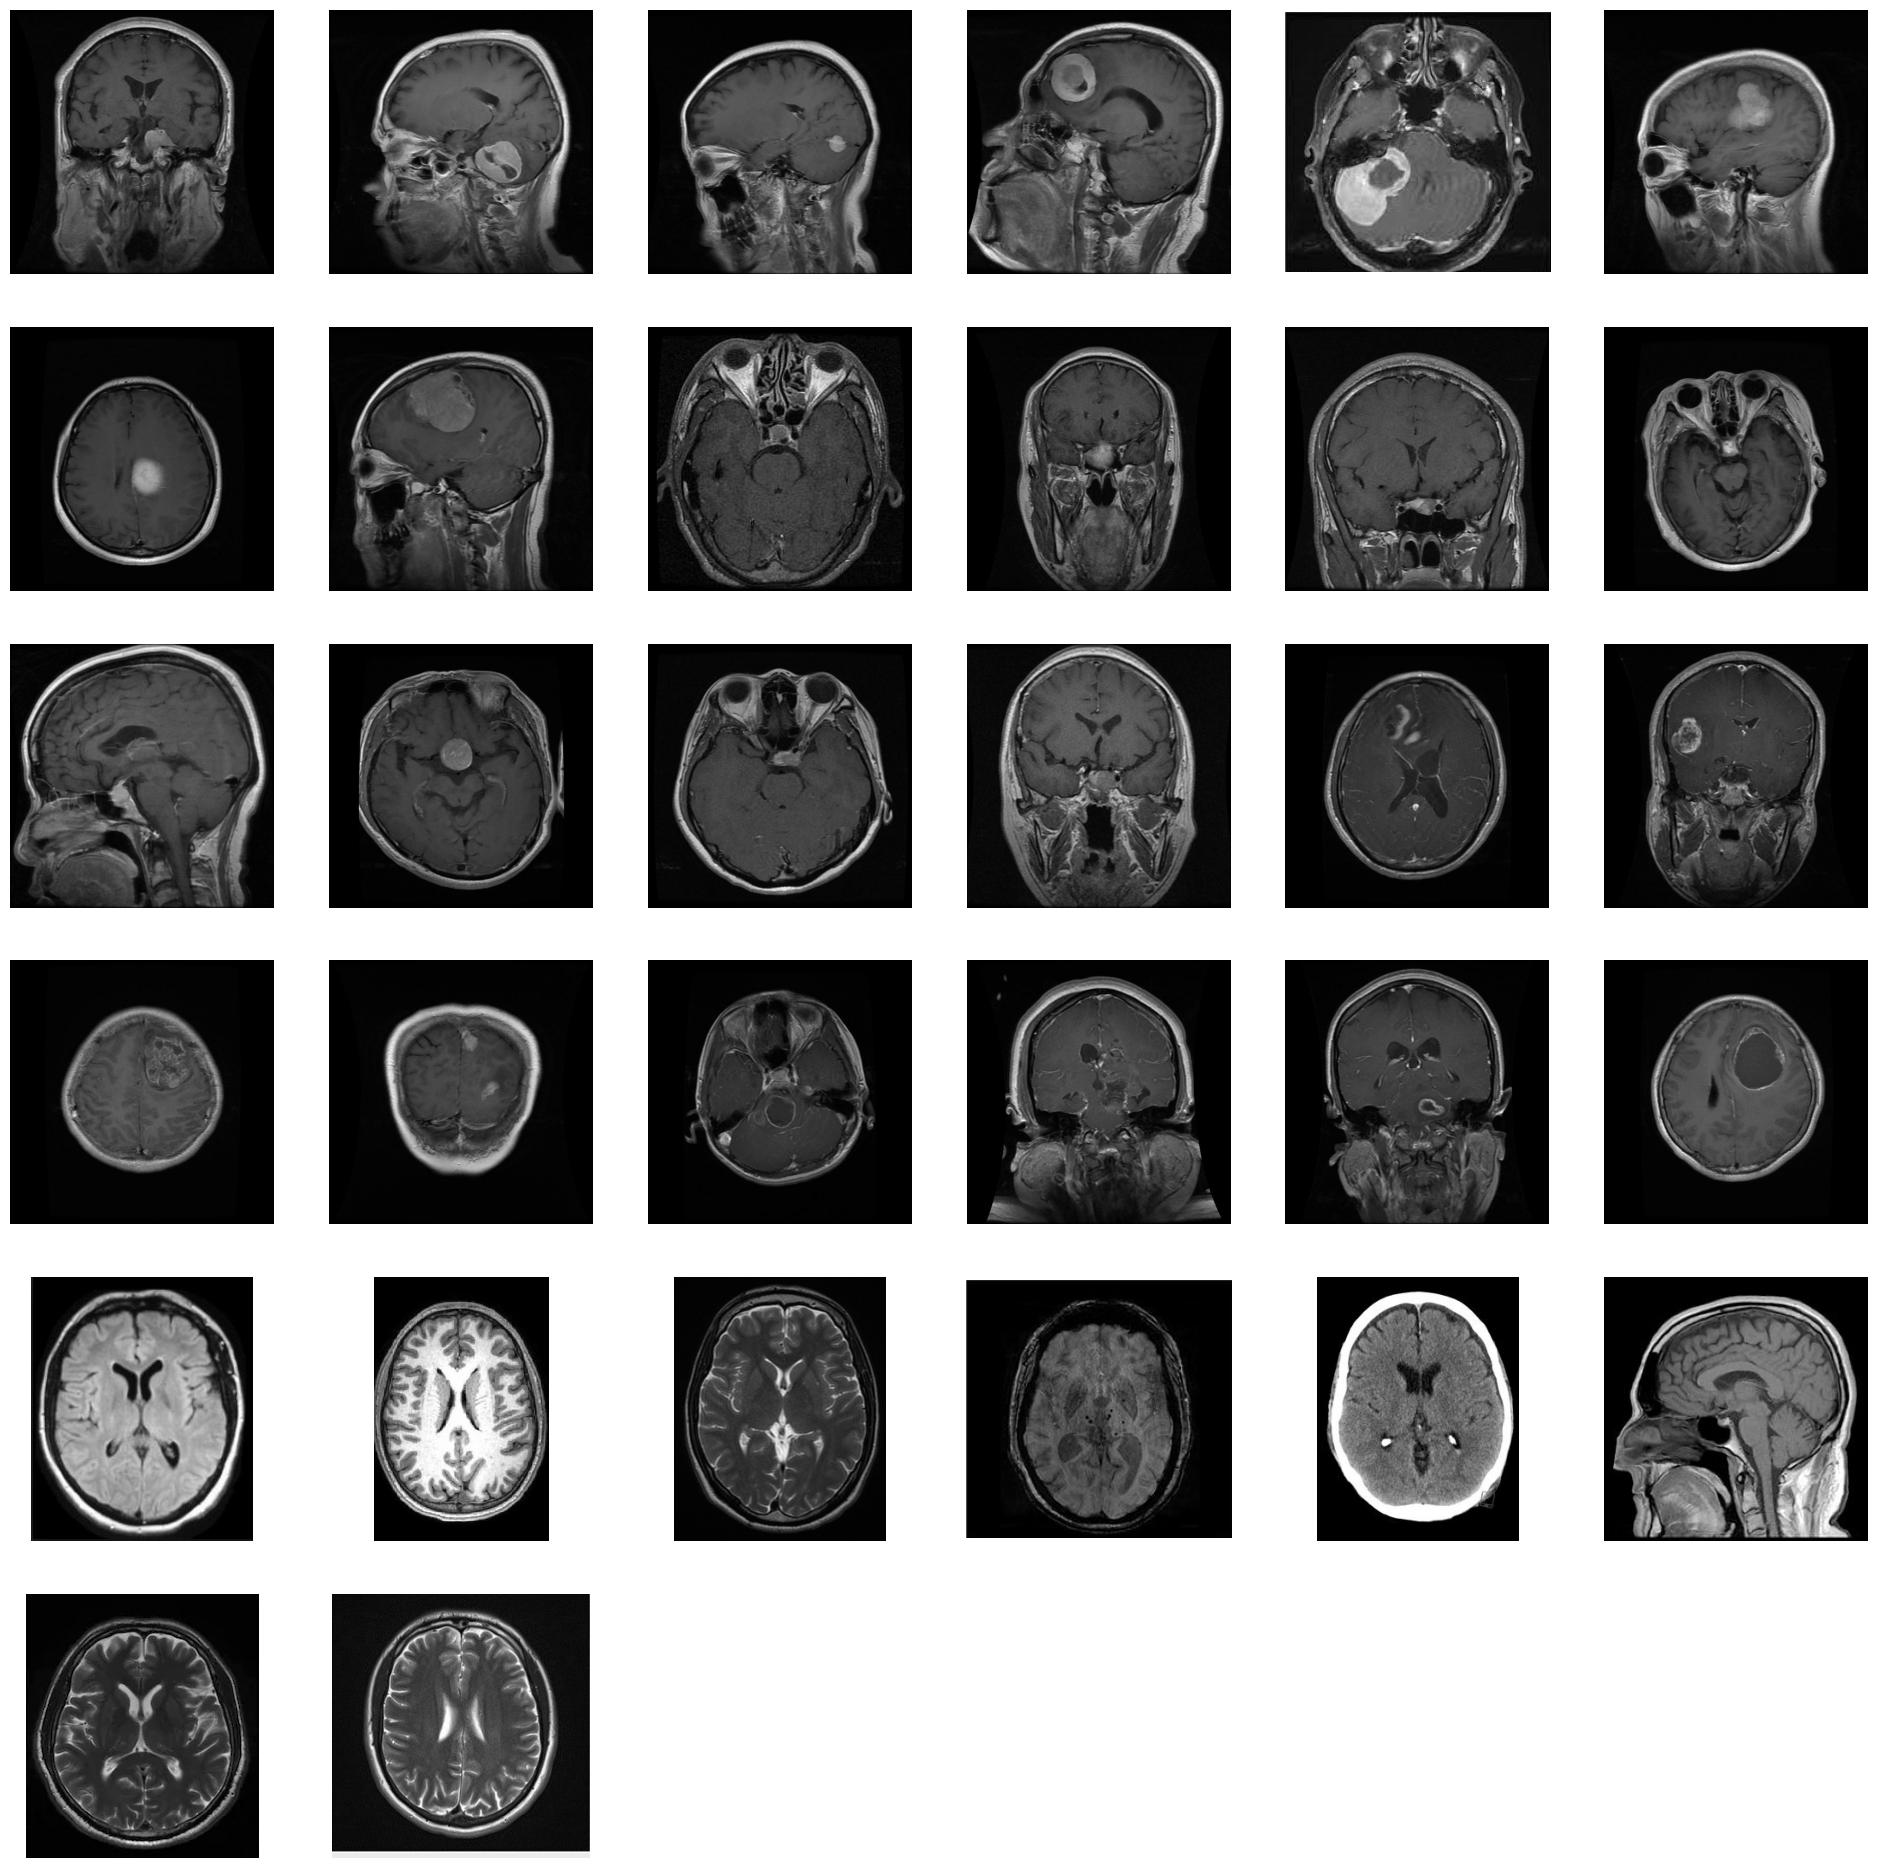

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_first_pix = [os.path.join(train_meningioma, fname) 
                for fname in train_meningioma_fnames[ pic_index-8:pic_index] 
               ]

next_second_pix = [os.path.join(train_pituitary, fname) 
                for fname in train_pituitary_fnames[ pic_index-8:pic_index]
               ]
               
next_third_pix = [os.path.join(train_glioma, fname) 
                for fname in train_glioma_fnames[ pic_index-8:pic_index]
               ]

next_forth_pix = [os.path.join(train_no_tumor, fname) 
                for fname in train_noTumor_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_first_pix + next_second_pix + next_third_pix + next_forth_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i+1 )
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
import os
import imageio.v2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import tensorflow as tf
from tensorflow import keras
from scipy import misc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam


path_train = '/content/Training'
path_test = '/content/Testing'

# initialize lists to store the image data, paths, and labels
data = []
y = []

# loop through the directories and files in the training data path
for r, d, f in os.walk(path_train):
    for file in f:
        if '.jpg' in file:
            # if the file is an image file, append its path to the paths_train list
            path = os.path.join(r, file)
            # use the parent directory to determine the label for the image and append it to the y list
            if 'glioma_tumor' in r:
                y.append(3)
            elif 'meningioma_tumor' in r:
                y.append(2)
            elif 'pituitary_tumor' in r:
                y.append(1)
            elif 'no_tumor' in r:
                y.append(0)
            # load the image using PIL, resize it to 128x128, and append it to the data list
            img = Image.open(path)
            img = img.resize((128, 128))
            img = np.array(img)
            if img.shape == (128, 128, 3):
                data.append(np.array(img))

# loop through the directories and files in the testing data path
for r, d, f in os.walk(path_test):
    for file in f:
        if '.jpg' in file:
            # if the file is an image file, append its path to the paths_test list
            path = os.path.join(r, file)
            # use the parent directory to determine the label for the image and append it to the y list
            if 'glioma_tumor' in r:
                y.append(3)
            elif 'meningioma_tumor' in r:
                y.append(2)
            elif 'pituitary_tumor' in r:
                y.append(1)
            elif 'no_tumor' in r:
                y.append(0)
            # load the image using PIL, resize it to 128x128, and append it to the data list
            img = Image.open(path)
            img = img.resize((128, 128))
            img = np.array(img)
            if img.shape == (128, 128, 3):
                data.append(np.array(img))

In [ ]:
data = np.array(data)
y = np.array(y)
y = np_utils.to_categorical(y)
print(data.shape)
print(y.shape)

(3264, 128, 128, 3)
(3264, 4)


In [ ]:
data= data.astype('float32')
data/=255

AxesImage(size=(128, 128))


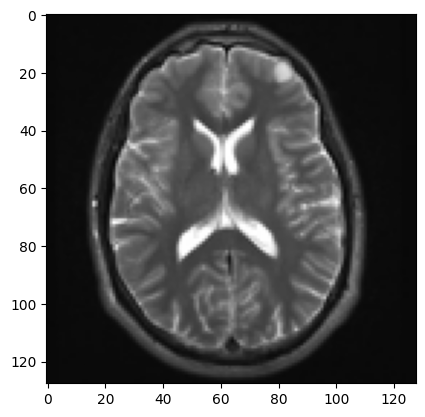

In [ ]:
print(plt.imshow(data[233]))

In [ ]:
X_train, X_test,y_train, y_test= train_test_split(data, y, test_size= 0.2 , shuffle = True, random_state = 42)

In [ ]:
#Model Architecture 
model = tf.keras.Sequential(
    [
     tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(128, 128 ,3)),
     tf.keras.layers.Conv2D(64, 3 , activation='relu'),
     tf.keras.layers.MaxPool2D(),

     tf.keras.layers.Conv2D(64, 3, activation='relu'),
     tf.keras.layers.Conv2D(64, 3 , activation='relu'),
     tf.keras.layers.MaxPool2D(),
     tf.keras.layers.Dropout(0.01),

     tf.keras.layers.Conv2D(128, 3, activation='relu'),
     tf.keras.layers.Conv2D(128, 3, activation='relu'),
     tf.keras.layers.Conv2D(128, 3, activation='relu'),
     tf.keras.layers.MaxPool2D(),
     tf.keras.layers.Dropout(0.01),

     tf.keras.layers.Conv2D(128, 3, activation='relu'),
     tf.keras.layers.Conv2D(256,3,activation='relu'),
     tf.keras.layers.MaxPool2D(),
     tf.keras.layers.Dropout(0.01),

     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(512,activation='relu'),
     tf.keras.layers.Dense(512,activation='relu'),
     tf.keras.layers.Dropout(0.3),
     tf.keras.layers.Dense(4,activation='softmax')

    ]
)



In [ ]:
# Set training parameters
'''model.compile(loss='categorical_crossentropy',
   optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001)
  ,metrics=['accuracy'])'''
# Set training parameters
otimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='categorical_crossentropy',optimizer=otimizer,metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 conv2d_10 (Conv2D)          (None, 124, 124, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 60, 64)        36928     
                                                                 
 conv2d_12 (Conv2D)          (None, 58, 58, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 29, 29, 64)       0         
 2D)                                                  

In [ ]:
# Constant for epochs
EPOCHS = 20

# Train the model
history = model.fit(
      X_train,
      y_train,  
      epochs=EPOCHS,
      verbose=2,
      validation_data = (X_test,y_test),
      batch_size=50
      )

Epoch 1/20
53/53 - 13s - loss: 1.3476 - accuracy: 0.3206 - val_loss: 1.2937 - val_accuracy: 0.4043 - 13s/epoch - 250ms/step
Epoch 2/20
53/53 - 5s - loss: 1.1026 - accuracy: 0.5167 - val_loss: 1.0619 - val_accuracy: 0.5436 - 5s/epoch - 101ms/step
Epoch 3/20
53/53 - 6s - loss: 0.9482 - accuracy: 0.5898 - val_loss: 0.9527 - val_accuracy: 0.5819 - 6s/epoch - 108ms/step
Epoch 4/20
53/53 - 6s - loss: 0.8277 - accuracy: 0.6530 - val_loss: 0.7724 - val_accuracy: 0.7060 - 6s/epoch - 108ms/step
Epoch 5/20
53/53 - 6s - loss: 0.7236 - accuracy: 0.6967 - val_loss: 0.7259 - val_accuracy: 0.7259 - 6s/epoch - 105ms/step
Epoch 6/20
53/53 - 5s - loss: 0.5649 - accuracy: 0.7802 - val_loss: 0.5861 - val_accuracy: 0.7902 - 5s/epoch - 103ms/step
Epoch 7/20
53/53 - 6s - loss: 0.4748 - accuracy: 0.8242 - val_loss: 0.5248 - val_accuracy: 0.8025 - 6s/epoch - 108ms/step
Epoch 8/20
53/53 - 5s - loss: 0.3918 - accuracy: 0.8514 - val_loss: 0.5266 - val_accuracy: 0.8116 - 5s/epoch - 103ms/step
Epoch 9/20
53/53 - 6s 

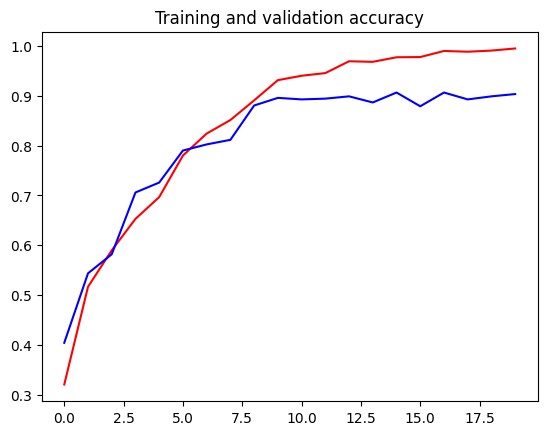

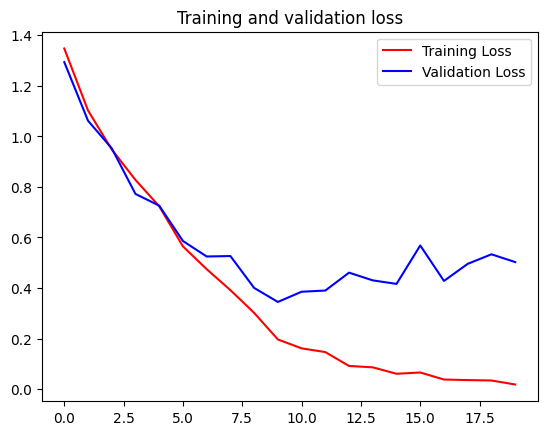

In [ ]:
import matplotlib.pyplot as plt

# Plot the model results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

21/21 [==============================] - 2s 59ms/step - loss: 0.5028 - accuracy: 0.9035
Test loss: 0.5028172135353088
Test accuracy: 0.9035221934318542


In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(128, 128))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  if (np.argmax(classes)==0):
    print("No Tumor!")
  elif (np.argmax(classes)==1):
    print("Pituitary Tumor!")
  elif (np.argmax(classes)==2):
    print("Meningioma Tumor!")
  else:
    print("Glioma Tumor!")

Saving test.jpg to test.jpg
1/1 [==============================] - 1s 1s/step
No Tumor!


In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)